In [2]:
# import libraries
from keras import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from keras import optimizers
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import os
from matplotlib import pyplot as plt

# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
# create the train and validate directories
train_dir = 'data/train'
val_dir = 'data/test'
# get a list of the label names
label_ids = [item for item in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, item))]
print('Total Labels Found: ', len(label_ids))
# generate a dataset from image files in our directory from scale 1 to 255
# because we defined our images in pixels (just an array consisting of values from 1 to 255)
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
# create training generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),  # 48 x 48 pixel images
    batch_size=64,  # number of training examples uterlized in one iteration
    color_mode='grayscale',  # for grayscale and white and black images
    class_mode='categorical')  # because we have catergories of faces (angry, sad, etc)
# create validation generator
validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(48, 48),  # 48 x 48 pixel images
    batch_size=64,  # number of training examples uterlized in one iteration
    color_mode='grayscale',  # for grayscale and white and black images
    class_mode='categorical')  # because we have catergories of faces (angry, sad, etc)
# create our model for training
# initializing our sequential model
# Sequential api: allows you to create model layer by layer
# but does not allow sharing layers with multiple inputs and outputs
# Functional api: allows you to create models with alot of flexibility that you can easily
# connect layer to more than just the previous next layer (you can connect layers to literally any layer)
model = Sequential()
# model configurations
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(label_ids), activation='softmax'))
# compile the model
model.compile(loss='categorical_crossentropy', optimizer=optimizers.adam_v2.Adam(learning_rate=0.0001, decay=1e-6),
              metrics=['accuracy'])
# train the model
model_info = model.fit(train_generator, steps_per_epoch=28709 // 64, epochs=50, validation_data=validation_generator, validation_steps=7178 // 64)
# Save trained model
model.save('model.h5')

Total Labels Found:  7
Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Epoch 1/50
448/448 [==============================] - 42s 74ms/step - loss: 1.7991 - accuracy: 0.2617 - val_loss: 1.6988 - val_accuracy: 0.3472
Epoch 2/50
448/448 [==============================] - 33s 74ms/step - loss: 1.6257 - accuracy: 0.3653 - val_loss: 1.5401 - val_accuracy: 0.4113
Epoch 3/50
448/448 [==============================] - 34s 76ms/step - loss: 1.5201 - accuracy: 0.4139 - val_loss: 1.4603 - val_accuracy: 0.4375
Epoch 4/50
448/448 [==============================] - 35s 77ms/step - loss: 1.4494 - accuracy: 0.4428 - val_loss: 1.3996 - val_accuracy: 0.4738
Epoch 5/50
448/448 [==============================] - 36s 80ms/step - loss: 1.3849 - accuracy: 0.4720 - val_loss: 1.3392 - val_accuracy: 0.4895
Epoch 6/50
448/448 [==============================] - 38s 84ms/step - loss: 1.3349 - accuracy: 0.4941 - val_loss: 1.2975 - val_accuracy: 0.5039
Epoch 7/50
448/448 [========

In [3]:
# save labels to text file
with open('labels.txt', 'w') as f:
    # loop trhough the found labels
    for names in label_ids:
        # save in text file in new line
        f.write(f"{names}\n")

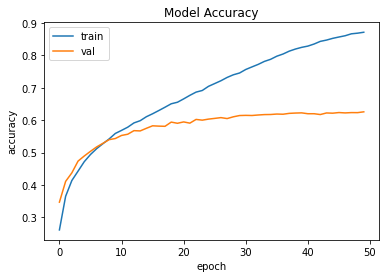

In [4]:
# summarize history for accuracy
plt.plot(model_info.history['accuracy'])
plt.plot(model_info.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

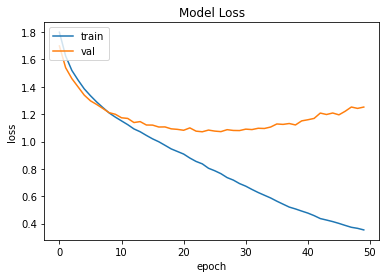

In [5]:
# summarize history for loss
plt.plot(model_info.history['loss'])
plt.plot(model_info.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [6]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
# Save the model.
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\umolu\AppData\Local\Temp\tmp35qg5ea9\assets


INFO:tensorflow:Assets written to: C:\Users\umolu\AppData\Local\Temp\tmp35qg5ea9\assets
